In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
!pip install adjustText

In [2]:
from gensim.models import KeyedVectors
import numpy as np

# Section 1

In [3]:
from practical_1 import distinct_words, compute_co_occurrence_matrix, reduce_to_k_dim, plot_embeddings, read_corpus_pl, plot_unnormalized, plot_normalized

[nltk_data] Downloading package reuters to
[nltk_data]     /home/bartekkrzepkowski/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package pl196x to
[nltk_data]     /home/bartekkrzepkowski/nltk_data...
[nltk_data]   Package pl196x is already up-to-date!


## a)

In [4]:
# Define toy corpus
test_corpus = ["START Ala miec kot i pies END".split(" "),
               "START Ala lubic kot END".split(" ")]     
test_corpus_words, num_corpus_words = distinct_words(test_corpus)

# Correct answers
ans_test_corpus_words = sorted(list(set([
    'Ala', 'END', 'START', 'i', 'kot', 'lubic', 'miec', 'pies'])))
ans_num_corpus_words = len(ans_test_corpus_words)

# Test correct number of words
assert(num_corpus_words == ans_num_corpus_words), "Incorrect number of distinct words. Correct: {}. Yours: {}".format(ans_num_corpus_words, num_corpus_words)

# Test correct words
assert (test_corpus_words == ans_test_corpus_words), "Incorrect corpus_words.\nCorrect: {}\nYours:   {}".format(str(ans_test_corpus_words), str(test_corpus_words))

# Print Success
print ("-" * 80)
print("Passed All Tests!")
print ("-" * 80)

--------------------------------------------------------------------------------
Passed All Tests!
--------------------------------------------------------------------------------


## b)

In [5]:
# Define toy corpus and get student's co-occurrence matrix
test_corpus = ["START Ala miec kot i pies END".split(" "),
               "START Ala lubic kot END".split(" ")]     
M_test, word2Ind_test = compute_co_occurrence_matrix(
    test_corpus, window_size=1)

# Correct M and word2Ind
M_test_ans = np.array([
    [0., 0., 2., 0., 0., 1., 1., 0.],
    [0., 0., 0., 0., 1., 0., 0., 1.],
    [2., 0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 1., 0., 0., 1.],
    [0., 1., 0., 1., 0., 1., 1., 0.],
    [1., 0., 0., 0., 1., 0., 0., 0.],
    [1., 0., 0., 0., 1., 0., 0., 0.],
    [0., 1., 0., 1., 0., 0., 0., 0.]
])

word2Ind_ans = {
    'Ala': 0, 'END': 1, 'START': 2, 'i': 3, 'kot': 4, 'lubic': 5, 'miec': 6,
    'pies': 7}

# Test correct word2Ind
assert (word2Ind_ans == word2Ind_test), "Your word2Ind is incorrect:\nCorrect: {}\nYours: {}".format(word2Ind_ans, word2Ind_test)

# Test correct M shape
assert (M_test.shape == M_test_ans.shape), "M matrix has incorrect shape.\nCorrect: {}\nYours: {}".format(M_test.shape, M_test_ans.shape)

# Test correct M values
for w1 in word2Ind_ans.keys():
    idx1 = word2Ind_ans[w1]
    for w2 in word2Ind_ans.keys():
        idx2 = word2Ind_ans[w2]
        student = M_test[idx1, idx2]
        correct = M_test_ans[idx1, idx2]
        if student != correct:
            print("Correct M:")
            print(M_test_ans)
            print("Your M: ")
            print(M_test)
            raise AssertionError("Incorrect count at index ({}, {})=({}, {}) in matrix M. Yours has {} but should have {}.".format(idx1, idx2, w1, w2, student, correct))

# Print Success
print ("-" * 80)
print("Passed All Tests!")
print ("-" * 80)

--------------------------------------------------------------------------------
Passed All Tests!
--------------------------------------------------------------------------------


## c)

In [6]:
# Define toy corpus and run student code
test_corpus = ["START Ala miec kot i pies END".split(" "),
               "START Ala lubic kot END".split(" ")]  
M_test, word2Ind_test = compute_co_occurrence_matrix(test_corpus, window_size=1)
M_test_reduced = reduce_to_k_dim(M_test, k=2)

# Test proper dimensions
assert (M_test_reduced.shape[0] == 8), "M_reduced has {} rows; should have {}".format(M_test_reduced.shape[0], 8)
assert (M_test_reduced.shape[1] == 2), "M_reduced has {} columns; should have {}".format(M_test_reduced.shape[1], 2)

# Print Success
print ("-" * 80)
print("Passed All Tests!")
print ("-" * 80)

Running Truncated SVD over 8 words...
Done.
--------------------------------------------------------------------------------
Passed All Tests!
--------------------------------------------------------------------------------


## d)

--------------------------------------------------------------------------------
Outputted Plot:


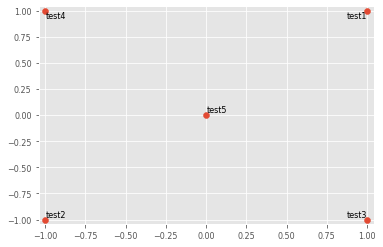

--------------------------------------------------------------------------------


In [7]:
print ("-" * 80)
print ("Outputted Plot:")

M_reduced_plot_test = np.array([[1, 1], [-1, -1], [1, -1], [-1, 1], [0, 0]])
word2Ind_plot_test = {
    'test1': 0, 'test2': 1, 'test3': 2, 'test4': 3, 'test5': 4}
words = ['test1', 'test2', 'test3', 'test4', 'test5']
plot_embeddings(M_reduced_plot_test, word2Ind_plot_test, words)

print ("-" * 80)

## e)

Running Truncated SVD over 22957 words...
Done.


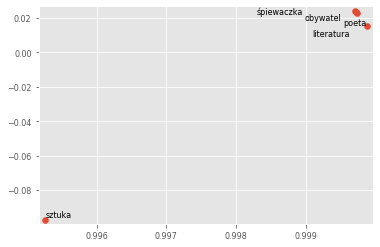

In [8]:
pl_corpus = read_corpus_pl()
words = [
    "sztuka", "śpiewaczka", "literatura", "poeta", "obywatel"]

plot_normalized(pl_corpus, words)

Two clusters are formed. One is made up of a single word sztuka and the other is made up of the rest of the words.
Words sztuka and literatura are related to each other as literatura is considered an example of sztuka (hyperonym).

Running Truncated SVD over 22957 words...
Done.


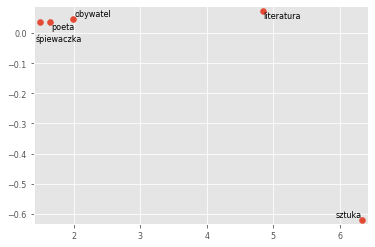

In [9]:
plot_unnormalized(pl_corpus, words)

Three clusters are formed. Two of the words sztuka and literature, and the third of the rest of the words.
As above, words sztuka and literatura are related to a relationship of superiority.
Normalization shows that the word literatura can be distinguished from the rest of the words.

# Section 2

In [10]:
from practical_1 import get_matrix_of_vectors

In [11]:
wv_from_bin_pl = KeyedVectors.load("word2vec/word2vec_100_3_polish.bin")

## a)

Shuffling words ...
Putting 10000 words into word2Ind and matrix M...
Done.
Running Truncated SVD over 10005 words...
Done.


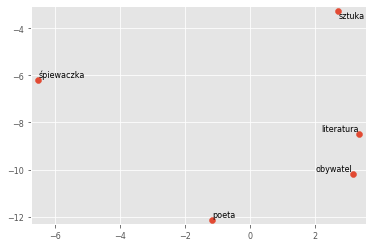

In [12]:
M, word2Ind = get_matrix_of_vectors(wv_from_bin_pl, words)
M_reduced = reduce_to_k_dim(M, k=2)

plot_embeddings(M_reduced, word2Ind, words)

Clusters of single words are formed, but it may be tempting to say that the words literatura and obywatel are contained in the same cluster.
As above, sztuka and literatura are related to a relationship of superiority.
Words śpiewaczka and poeta are, in turn, examples of the portrayal of art.
In this case, the words are clearly delineated.
Personally, on the basis of these examples only, I do not see any obvious dependencies, except that category of people are linearly separable from the category of creations of people.

## b)

In [14]:
wv_from_bin_pl.most_similar("twierdzenie")

/home/bartekkrzepkowski/.virtualenvs/tldl/lib/python3.8/site-packages/gensim/models/keyedvectors.py:783: RuntimeWarning: invalid value encountered in true_divide
  dists = dot(self.vectors[clip_start:clip_end], mean) / self.norms[clip_start:clip_end]


[('teza', 0.8549568057060242),
 ('hipoteza', 0.8321427702903748),
 ('stwierdzenie', 0.8162620663642883),
 ('przypuszczenie', 0.7883314490318298),
 ('domniemanie', 0.7763071656227112),
 ('uogólnienie', 0.7716750502586365),
 ('aksjomat', 0.7690795063972473),
 ('teoria', 0.7676085829734802),
 ('pogląd', 0.7642797827720642),
 ('argument', 0.7630875706672668)]

We have here aksjomat, argument (base of inference), uogólnienie, pogląd (result of inference). 

In [15]:
wv_from_bin_pl.most_similar("zamek")

[('zameczek', 0.8462140560150146),
 ('pałac', 0.7984483242034912),
 ('zamczysko', 0.785627007484436),
 ('forteca', 0.7682814002037048),
 ('grodź', 0.7508893609046936),
 ('warownia', 0.7442566156387329),
 ('gród', 0.736450731754303),
 ('donżon', 0.7312632203102112),
 ('dworzyszcze', 0.7277812957763672),
 ('cytadela', 0.7103342413902283)]

We have here pałac (object), grodź (place).

In [16]:
wv_from_bin_pl.most_similar("bank")

[('banka', 0.8007293343544006),
 ('przedsiębiorstwo', 0.7445671558380127),
 ('bankowy', 0.7276203036308289),
 ('citibanku', 0.7176083922386169),
 ('bgk', 0.7032768130302429),
 ('firma', 0.6960212588310242),
 ('kasa', 0.6915611028671265),
 ('koncern', 0.6907871961593628),
 ('holding', 0.6835991144180298),
 ('spółka', 0.6814464926719666)]

We have here firma (institution), kasa (place).

In [17]:
wv_from_bin_pl.most_similar("osobnik")

[('samiec', 0.7817413210868835),
 ('samica', 0.7275031805038452),
 ('mężczyzna', 0.6902393698692322),
 ('ssak', 0.6834823489189148),
 ('zwierzę', 0.6787737011909485),
 ('indywiduum', 0.6760104894638062),
 ('gryzoń', 0.6756496429443359),
 ('gatunek', 0.6698778867721558),
 ('okaz', 0.6620389223098755),
 ('drapieżnik', 0.6578028798103333)]

We have here indywiduum (entity), mężczyzna (part of some taxonomy).

In [18]:
wv_from_bin_pl.most_similar("siła")

[('siły', 0.9388737678527832),
 ('moc', 0.7339487671852112),
 ('energia', 0.7252694368362427),
 ('potęga', 0.6890466809272766),
 ('sil', 0.6847106218338013),
 ('potencjał', 0.6703965067863464),
 ('determinacja', 0.6345338821411133),
 ('wysiłek', 0.625451385974884),
 ('żywioł', 0.6157348155975342),
 ('masy', 0.6156232953071594)]

We have here potencjał (physical magnitude), żywioł (phenomenon).

In [19]:
wv_from_bin_pl.most_similar("zero")

[('minus', 0.7601489424705505),
 ('zerowy', 0.7081139087677002),
 ('przecinek', 0.6111993193626404),
 ('minusowy', 0.5990052819252014),
 ('jedynkowy', 0.5925155282020569),
 ('wielokrotność', 0.5891561508178711),
 ('miliparseków', 0.5888294577598572),
 ('centylion', 0.5673032402992249),
 ('cyfra', 0.5544325709342957),
 ('wskaźnik', 0.548725962638855)]

We have here zerowy (magnitude), cyfra (representation).

Many polysemes may not work because of too little resemblance to the word written or because words are rarely used to denote other meanings in similar contexts - some phrases create rare collocations.

## c)

In [21]:
w1 = 'daleki'
w2 = 'odległy'
w3 = 'bliski'

w1_w2_dist = wv_from_bin_pl.distance(w1, w2)
w1_w3_dist = wv_from_bin_pl.distance(w1, w3)

In [22]:
print("Synonyms {}, {} have cosine distance: {}".format(w1, w2, w1_w2_dist))
print("Antonyms {}, {} have cosine distance: {}".format(w1, w3, w1_w3_dist))

Synonyms daleki, odległy have cosine distance: 0.46225959062576294
Antonyms daleki, bliski have cosine distance: 0.4220016598701477


I suppose that word odległy is used less frequently than word daleki, and therefore its location may not be as well argued in the feature space as word daleki.

## d)

In [36]:
import pprint

syn : mężczyzna :: córka : kobieta

In [25]:
pprint.pprint(wv_from_bin_pl.most_similar(
    positive=["syn", "kobieta"], negative=["mezczyzna"]))

[('córka', 0.6928777098655701),
 ('dziecko', 0.6763085722923279),
 ('matka', 0.6552439332008362),
 ('żona', 0.6547046899795532),
 ('siostra', 0.6358523368835449),
 ('mąż', 0.6058387160301208),
 ('dziewczę', 0.6008315086364746),
 ('rodzic', 0.5781418681144714),
 ('ojciec', 0.5779308676719666),
 ('rodzeństwo', 0.5768202543258667)]


/home/bartekkrzepkowski/.virtualenvs/tldl/lib/python3.8/site-packages/gensim/models/keyedvectors.py:783: RuntimeWarning: invalid value encountered in true_divide
  dists = dot(self.vectors[clip_start:clip_end], mean) / self.norms[clip_start:clip_end]


pociąg : wagon :: ręka : dłoń

In [37]:
pprint.pprint(wv_from_bin_pl.most_similar(
    positive=["ręka", "wagon"], negative=["pociąg"]))

[('dłoń', 0.785654604434967),
 ('ramię', 0.7315312027931213),
 ('rączka', 0.7312504649162292),
 ('łokieć', 0.7005126476287842),
 ('palce', 0.6956580281257629),
 ('noga', 0.681489884853363),
 ('oburącz', 0.6801837086677551),
 ('uchwyt', 0.6611544489860535),
 ('wałek', 0.6610097885131836),
 ('łapa', 0.6568883657455444)]


We have a part-to-whole ratio here.

## e)

prawda : jeden :: fałsz : zero

In [38]:
pprint.pprint(wv_from_bin_pl.most_similar(
    positive=['jeden', "fałsz"], negative=["prawda"]))

[('jedno', 0.5667946338653564),
 ('jednać', 0.5502198934555054),
 ('dwa', 0.5317965745925903),
 ('trzy', 0.5205088257789612),
 ('pojedynczy', 0.5073424577713013),
 ('kilka', 0.49279817938804626),
 ('cztery', 0.4857700765132904),
 ('drugi', 0.4839387834072113),
 ('uderzefi', 0.45493456721305847),
 ('którykolwiek', 0.4510669708251953)]


with regard to the model: b = jedno

drugi : przedostatni :: pierwszy : ostatni

In [39]:
pprint.pprint(wv_from_bin_pl.most_similar(
    positive=["pierwszy", "przedostatni"], negative=["drugi"]))

[('pierwsze', 0.6314462423324585),
 ('jedenasty', 0.6205568313598633),
 ('ostatni', 0.6193532943725586),
 ('wszym', 0.6074247360229492),
 ('piewszym', 0.6067755818367004),
 ('piąty', 0.5967206954956055),
 ('ósmy', 0.595788300037384),
 ('dziesiąty', 0.5953986048698425),
 ('czwarty', 0.5912323594093323),
 ('dwunasty', 0.581502377986908)]


with regard to the model: b = pierwsze, but ostatni is at third place

## f)

In [40]:
pprint.pprint(wv_from_bin_pl.most_similar(
    positive=['kobieta', 'szef'], negative=['mężczyzna']))

[('szefowa', 0.7804161906242371),
 ('dyrektor', 0.7297706604003906),
 ('wicedyrektor', 0.7045008540153503),
 ('pełnomocnik', 0.6774820685386658),
 ('kierownik', 0.6725601553916931),
 ('kierowniczka', 0.6669354438781738),
 ('szefostwo', 0.6597798466682434),
 ('inspektor', 0.6581058502197266),
 ('sekretarz', 0.651980996131897),
 ('konsultant', 0.643165647983551)]


In the first, the highest analogy is correct, in the following suggestions I would not accept the wicedyrektor. The masculine form of nouns can also be a problem, in some cases where some might believe that the form here should be feminine.

In [41]:
pprint.pprint(wv_from_bin_pl.most_similar(
    positive=['mężczyzna', 'prezes'], negative=['kobieta']))

[('wiceprezes', 0.8360482454299927),
 ('przewodniczący', 0.7715734243392944),
 ('wiceprzewodniczący', 0.7210662961006165),
 ('dyrektor', 0.7132858633995056),
 ('sekretarz', 0.6834158897399902),
 ('prokurent', 0.6543394923210144),
 ('szef', 0.6500486135482788),
 ('zastępca', 0.6431276798248291),
 ('skarbnik', 0.6402174234390259),
 ('wiceszef', 0.6378557682037354)]


In the second, the highest analogy could be hailed as iconoclastic. However, word przewodniczący or dyrektor seem to be an acceptable analogy.

## g)

mężczyzna : żołnierz :: kobieta : jeniec

In [42]:
pprint.pprint(wv_from_bin_pl.most_similar(
    positive=['kobieta', 'żołnierz'], negative=['mężczyzna']))

[('jeniec', 0.7389187216758728),
 ('nierzy', 0.7114187479019165),
 ('partyzant', 0.7081775069236755),
 ('armia', 0.6831960082054138),
 ('legionista', 0.6780228614807129),
 ('kozak', 0.6712470054626465),
 ('konnica', 0.661159873008728),
 ('wojsko', 0.6555836200714111),
 ('kawalerzysta', 0.6523666381835938),
 ('najemnik', 0.6501129269599915)]


While the soldier is a predominantly male profession, this analogy is highly inappropriate.

polak : praca :: włoch : nauka

In [43]:
pprint.pprint(wv_from_bin_pl.most_similar(
    positive=['polak', 'praca'], negative=['włoch']))

[('pracownik', 0.5494521856307983),
 ('pracv', 0.5423469543457031),
 ('wychowanie', 0.5351208448410034),
 ('działalność', 0.5266505479812622),
 ('nauczycielstwo', 0.5124801397323608),
 ('samokrytyka', 0.5109484791755676),
 ('ankieta', 0.5104095339775085),
 ('robotnik', 0.5045477747917175),
 ('ociemniały', 0.5045210123062134),
 ('fö', 0.5024222731590271)]


In [44]:
pprint.pprint(wv_from_bin_pl.most_similar(
    positive=['włoch', 'praca'], negative=['polak']))

[('studia', 0.5339575409889221),
 ('zajęcia', 0.5178396105766296),
 ('rekonwalescencja', 0.517360508441925),
 ('opalanie', 0.5110158920288086),
 ('kuracja', 0.4879070520401001),
 ('podróż', 0.47431042790412903),
 ('haftowanie', 0.4733882546424866),
 ('prace', 0.4729936420917511),
 ('reperacja', 0.4706401824951172),
 ('podrożyć', 0.46828797459602356)]


You can see the national bias here. When we equate a Pole with work, then an Italian with studies, but the opposite is true.

## h)

The reason may be that certain expressions are used more often than others in the training set. For example, the profession of a soldier is more often mentioned in the context of a man, and education in the context of wealthier countries.

# Section 3

In [26]:
def load_word2vec():
    """ Load Word2Vec Vectors
        Return:
            wv_from_bin: All 3 million embeddings, each lengh 300
    """
    import gensim.downloader as api
    wv_from_bin = api.load("word2vec-google-news-300")
    vocab = list(wv_from_bin.key_to_index.keys())
    print("Loaded vocab size %i" % len(vocab))
    return wv_from_bin

wv_from_bin = load_word2vec()

Loaded vocab size 3000000


## b)

In [27]:
wv_from_bin.most_similar("proposition")

[('propositions', 0.6777419447898865),
 ('propostion', 0.4960918128490448),
 ('idea', 0.4891168475151062),
 ('concept', 0.4660651385784149),
 ('premise', 0.45228350162506104),
 ('notion', 0.4463728964328766),
 ('proposal', 0.4458281397819519),
 ('value_proposition', 0.4440843462944031),
 ('argument', 0.4432620406150818),
 ('attractive_proposition', 0.4134068787097931)]

We have here premise (base of inference), proposal (result of inference), similar to the observations in the case of the Polish language.

In [28]:
wv_from_bin.most_similar("castle")

[('castles', 0.7333530783653259),
 ('medieval_castle', 0.683101236820221),
 ('manor_house', 0.6663694381713867),
 ('palace', 0.6421201229095459),
 ('Dracula_castle', 0.6233095526695251),
 ('manor', 0.6158249378204346),
 ('medieval_fortress', 0.6064208745956421),
 ('mansion', 0.6051708459854126),
 ('Viscri', 0.6032644510269165),
 ('fairytale_castle', 0.6003632545471191)]

In this case polysemic does not work because of the choice of the translation.

In [30]:
wv_from_bin.most_similar("bank")

[('banks', 0.7440759539604187),
 ('banking', 0.690161406993866),
 ('Bank', 0.6698698401451111),
 ('lender', 0.6342284679412842),
 ('banker', 0.6092953085899353),
 ('depositors', 0.6031531691551208),
 ('mortgage_lender', 0.5797975659370422),
 ('depositor', 0.5716427564620972),
 ('BofA', 0.5714625120162964),
 ('Citibank', 0.5589520335197449)]

We have here banker, lender, depositor, mortgage_lender, so a person associated with the institution than the institution itself, as was the case with the Polish language.

In [63]:
wv_from_bin.most_similar("specimen")

[('specimens', 0.8108956217765808),
 ('SWAN_Repository', 0.5859660506248474),
 ('Routine_urine', 0.5553357005119324),
 ('holotype', 0.5519661903381348),
 ('Mesonychoteuthis_hamiltoni', 0.5518268942832947),
 ('ichthyosaur', 0.5502352714538574),
 ('Specimens', 0.536460280418396),
 ('coprolite', 0.5309837460517883),
 ('gigantea', 0.5301076769828796),
 ('trilobite', 0.5263841152191162)]

In this case, the selected translation refers to the representatives of the selected taxonomy.

In [83]:
wv_from_bin.most_similar("force")

[('forces', 0.5195289254188538),
 ('Faulcon_resigned', 0.4617016315460205),
 ('Mohammed_Majah', 0.42029979825019836),
 ('Nato_Isaf', 0.4123663306236267),
 ('professional_nonpolitical_militarily', 0.4074799418449402),
 ('subdue', 0.4044072926044464),
 ('firepower', 0.4041649401187897),
 ('army', 0.4025460183620453),
 ('peacekeeping_force', 0.40173718333244324),
 ('expeditionary_force', 0.397803395986557)]

As with the word zamek, the specific meaning depends on the selected translation.

In [82]:
wv_from_bin.most_similar("zero")

[('cooling_rubidium', 0.5202601552009583),
 ('N_trig_DuoSense_dual', 0.5016306042671204),
 ('zilch', 0.47530174255371094),
 ('Zuccotti_Park_adjacent', 0.47465378046035767),
 ('Zero', 0.4705132246017456),
 ('minus', 0.4661273658275604),
 ('ZERO', 0.46135392785072327),
 ('voltage_switching_ZVS', 0.4561628997325897),
 ('runway_incursions_Babbitt', 0.4523276686668396),
 ('low', 0.45149368047714233)]

In this case we are referring to the order scale, and we are referring to chilling.

## c)

In [67]:
w1 = 'far'
w2 = 'distant'
w3 = 'close'

w1_w2_dist = wv_from_bin.distance(w1, w2)
w1_w3_dist = wv_from_bin.distance(w1, w3)

In [68]:
print("Synonyms {}, {} have cosine distance: {}".format(w1, w2, w1_w2_dist))
print("Antonyms {}, {} have cosine distance: {}".format(w1, w3, w1_w3_dist))

Synonyms far, distant have cosine distance: 0.7037246823310852
Antonyms far, close have cosine distance: 0.7440123558044434


There is no relationship in the case of English equivalents.

## d)

son : man :: daughter : woman

In [69]:
pprint.pprint(wv_from_bin.most_similar(
    positive=["son", "woman"], negative=["man"]))

[('daughter', 0.8796941041946411),
 ('mother', 0.8246030211448669),
 ('niece', 0.7625203132629395),
 ('husband', 0.739037275314331),
 ('granddaughter', 0.7366384863853455),
 ('eldest_daughter', 0.7307103872299194),
 ('daughters', 0.7241971492767334),
 ('father', 0.7208905816078186),
 ('sister', 0.697901725769043),
 ('grandson', 0.6924970746040344)]


Same analogy occures.

train : carriage :: arm : hand

In [74]:
pprint.pprint(wv_from_bin.most_similar(
    positive=["arm", "waggon"], negative=["train"]))

[('telescopic_pole', 0.43332403898239136),
 ('pinky_fingers', 0.415249764919281),
 ('appendage', 0.40631693601608276),
 ('vulcan', 0.4045245349407196),
 ('dangly_bits', 0.39716246724128723),
 ('bandaged_stump', 0.39588451385498047),
 ('sling', 0.39564502239227295),
 ('ol_gunslinger_connecting', 0.3945610225200653),
 ('hind_quarters', 0.39425647258758545),
 ('noggin', 0.3927306532859802)]


There is no analogy in this case.

## e)

true : one :: false : zero

In [75]:
pprint.pprint(wv_from_bin.most_similar(
    positive=["false", 'one'], negative=["true"]))

[('five', 0.45687663555145264),
 ('four', 0.44636452198028564),
 ('six', 0.44571730494499207),
 ('three', 0.4432404041290283),
 ('seven', 0.4423168897628784),
 ('eight', 0.4236225187778473),
 ('two', 0.4227715730667114),
 ('nine', 0.4085020124912262),
 ('each', 0.3993107080459595),
 ('another', 0.35616299510002136)]


Neither does the analogy hold in this case

first : final :: second :: penultimate

In [76]:
pprint.pprint(wv_from_bin.most_similar(
    positive=["first", "penultimate"], negative=["second"]))

[('final', 0.5259937047958374),
 ('inaugural', 0.4694477915763855),
 ('Rallye_Automobile_Monte_Carlo', 0.4557393789291382),
 ('Kensington_Oval_Barbados', 0.44756728410720825),
 ('highpoint', 0.44389209151268005),
 ('Hockenheimring_Baden_Württemberg', 0.44274476170539856),
 ('maiden', 0.4385904371738434),
 ('quadrennial_mega', 0.4324509799480438),
 ('Hawkstone_Park', 0.4284977912902832),
 ('semi_fi_nal', 0.427691251039505)]


There is analogy in this case.

## f)

In [78]:
pprint.pprint(wv_from_bin.most_similar(
    positive=['woman', 'boss'], negative=['man']))

[('bosses', 0.5522644519805908),
 ('manageress', 0.49151360988616943),
 ('exec', 0.45940810441970825),
 ('Manageress', 0.4559843838214874),
 ('receptionist', 0.4474116563796997),
 ('Jane_Danson', 0.44480547308921814),
 ('Fiz_Jennie_McAlpine', 0.4427576959133148),
 ('Coronation_Street_actress', 0.44275563955307007),
 ('supremo', 0.4409853219985962),
 ('coworker', 0.43986251950263977)]


For some reason, the model refers to the plural, proper nouns, and the word receptionist.

In [80]:
pprint.pprint(wv_from_bin.most_similar(
    positive=['man', 'chairman'], negative=['woman']))

[('Chairman', 0.7163518667221069),
 ('chariman', 0.6484905481338501),
 ('chairmain', 0.6070235371589661),
 ('chief_executive', 0.5947784781455994),
 ('Chariman', 0.5882598757743835),
 ('chaiman', 0.5767490267753601),
 ('vicechairman', 0.5463533997535706),
 ('chairman_emeritus', 0.5410268306732178),
 ('cochairman', 0.5251522660255432),
 ('supremo', 0.5208278298377991)]


In this case, it is difficult to find an English equivalent of the word chairman which distinguishes between the sexes.

## g)

In [81]:
pprint.pprint(wv_from_bin.most_similar(
    positive=['woman', 'soldier'], negative=['man']))

[('solider', 0.718359112739563),
 ('serviceman', 0.6742279529571533),
 ('soldiers', 0.6567003726959229),
 ('servicemember', 0.5990378260612488),
 ('airman', 0.587567925453186),
 ('servicemen', 0.5615009665489197),
 ('servicewoman', 0.5602388978004456),
 ('Pfc', 0.5597403049468994),
 ('Soldier', 0.5545828342437744),
 ('guardsman', 0.5480968952178955)]


In this case, there is no word that is as inappropriate as in the analysis of analogues in Polish. In this case, the female equivalent of the word soldier, servicewoman, is only in the second half of the proposal.

First of all, it should be noted that the comparison depends on the choice of translating words from one language to another. For example, the word zamek does not have the same polysemic word in English (castle, lock, clasp) as it is in Polish. Additionally, some words in one language do not necessarily line up with others when translated, even though the component words translate correctly. We can translate ten daleki odgłos as that distant noise, but not that far noise. Word embeddings are a reflection of the use of words in a language, so it is natural that they will differ from one language to another because language is inherently linked with entities that use it. It's hard to expect people from different communities to discuss the same issues in the same way.